# UAB - Aprendizaje Computacional  

## Cas Kaggle 

## Introducción

Las base de datos consiste en el analisis de anomalias, de caidas en personas, para ello se han utilizado las etiquetas ,_010-000-024-033, 010-000-030-096, 020-000-032-221 y 020-000-033-111_ que  son representaciones codificadas en caliente de cada actividad del sensor. Se utilizaron cuatro sensores durante los experimentos, que se han fijado al pecho, los tobillos y el cinturón de la persona.

Las etiquetas representan el evento de caída / vida normal, donde 0 es normal y 1 es el evento anómalo de caída.

Cada archivo .csv es una persona distinta que se ha observado durante los experimentos. Se dan 5 personas de prueba y 20 personas de formación.

## Librerias Usadas

In [166]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm, ensemble,metrics
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV,KFold, StratifiedKFold, cross_val_score,LeaveOneOut
from numpy import mean,std
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score, accuracy_score,roc_curve,classification_report,auc,precision_recall_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
import altair as alt
from imblearn.under_sampling import RandomUnderSampler
import timeit
from collections import Counter
warnings.filterwarnings('ignore')


In [167]:
# Funcion para borrar elementos nulos.
def columns_with_na(dframe):
    temp = dframe.isna().sum()
    temp = temp[temp >0]
    print(f"Columns containing nan values:{temp.index}")
    return temp.index

## Combinacion de los datos

In [168]:
files= os.listdir('..\\data\\train') 
files_test=  os.listdir('..\\data\\test')

In [169]:
full_dataset_train = pd.DataFrame()
for file in files:
     if file.endswith('.csv'):
         full_dataset_train  = full_dataset_train .append(pd.read_csv('..\\data\\train\\' + file), ignore_index=True) 
full_dataset_train

,x,y,z,010-000-024-033,010-000-030-096,020-000-032-221,020-000-033-111,anomaly
0,18.496,13.767,14.363,0.000,0.000,0.000,1.000,0.000
1,18.501,13.827,14.270,0.000,0.000,1.000,0.000,0.000
2,18.406,13.869,14.095,1.000,0.000,0.000,0.000,0.000
3,18.445,13.911,14.116,0.000,1.000,0.000,0.000,0.000
4,18.418,13.934,14.321,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...
134224,9.539,13.049,12.345,0.000,0.000,0.000,1.000,0.000
134225,9.546,13.058,12.364,1.000,0.000,0.000,0.000,0.000
134226,9.575,13.080,12.180,0.000,0.000,1.000,0.000,0.000
134227,9.496,12.996,12.143,0.000,1.000,0.000,0.000,0.000


In [170]:
full_dataset_train = full_dataset_train.drop_duplicates()

In [171]:
full_dataset_train

,x,y,z,010-000-024-033,010-000-030-096,020-000-032-221,020-000-033-111,anomaly
0,18.496,13.767,14.363,0.000,0.000,0.000,1.000,0.000
1,18.501,13.827,14.270,0.000,0.000,1.000,0.000,0.000
2,18.406,13.869,14.095,1.000,0.000,0.000,0.000,0.000
3,18.445,13.911,14.116,0.000,1.000,0.000,0.000,0.000
4,18.418,13.934,14.321,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...
134224,9.539,13.049,12.345,0.000,0.000,0.000,1.000,0.000
134225,9.546,13.058,12.364,1.000,0.000,0.000,0.000,0.000
134226,9.575,13.080,12.180,0.000,0.000,1.000,0.000,0.000
134227,9.496,12.996,12.143,0.000,1.000,0.000,0.000,0.000


In [172]:
full_dataset_test = pd.DataFrame()
for file in files_test:
     if file.endswith('.csv'):
         full_dataset_test = full_dataset_test.append(pd.read_csv('..\\data\\test\\' + file), ignore_index=True) 
full_dataset_test

,x,y,z,010-000-024-033,010-000-030-096,020-000-032-221,020-000-033-111,anomaly
0,6.913,11.519,15.472,0.000,0.000,0.000,1.000,0.000
1,6.936,11.575,15.447,0.000,0.000,1.000,0.000,0.000
2,6.935,11.572,15.438,1.000,0.000,0.000,0.000,0.000
3,6.887,11.562,15.704,0.000,0.000,0.000,1.000,0.000
4,6.922,11.598,15.634,0.000,0.000,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...
30025,10.383,14.496,10.681,1.000,0.000,0.000,0.000,0.000
30026,10.465,14.493,10.830,0.000,0.000,1.000,0.000,0.000
30027,10.432,14.500,10.619,0.000,1.000,0.000,0.000,0.000
30028,10.402,14.455,10.952,0.000,0.000,0.000,1.000,0.000


## Exploracion de los datos 

In [173]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#Obligamos que meutre todas las columnas
pd.set_option('display.max_columns', None)

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

In [174]:
# Carreguem dataset d'exemple
dataset=load_dataset('..\\data\\train\\data_0.csv')

In [175]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5805 entries, 0 to 5804
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x                5805 non-null   float64
 1   y                5805 non-null   float64
 2   z                5805 non-null   float64
 3   010-000-024-033  5805 non-null   float64
 4   010-000-030-096  5805 non-null   float64
 5   020-000-032-221  5805 non-null   float64
 6   020-000-033-111  5805 non-null   float64
 7   anomaly          5805 non-null   float64
dtypes: float64(8)
memory usage: 362.9 KB


In [176]:
dataset.describe()

,x,y,z,010-000-024-033,010-000-030-096,020-000-032-221,020-000-033-111,anomaly
count,5805.000,5805.000,5805.000,5805.000,5805.000,5805.000,5805.000,5805.000
mean,12.660,12.698,12.263,0.286,0.149,0.283,0.282,0.056
std,3.948,3.037,1.286,0.452,0.356,0.450,0.450,0.231
min,5.989,7.767,9.053,0.000,0.000,0.000,0.000,0.000
25%,7.992,10.189,11.260,0.000,0.000,0.000,0.000,0.000
50%,13.516,11.710,12.377,0.000,0.000,0.000,0.000,0.000
75%,16.423,15.538,13.103,1.000,0.000,1.000,1.000,0.000
max,18.658,18.700,15.011,1.000,1.000,1.000,1.000,1.000


In [177]:
dataset.keys()

Index(['x', 'y', 'z', '010-000-024-033', '010-000-030-096', '020-000-032-221',
       '020-000-033-111', 'anomaly'],
      dtype='object')

In [178]:
dataset.head()

,x,y,z,010-000-024-033,010-000-030-096,020-000-032-221,020-000-033-111,anomaly
0,18.496,13.767,14.363,0.000,0.000,0.000,1.000,0.000
1,18.501,13.827,14.270,0.000,0.000,1.000,0.000,0.000
2,18.406,13.869,14.095,1.000,0.000,0.000,0.000,0.000
3,18.445,13.911,14.116,0.000,1.000,0.000,0.000,0.000
4,18.418,13.934,14.321,0.000,0.000,0.000,1.000,0.000


In [179]:
dataset.isnull().sum()

x                  0
y                  0
z                  0
010-000-024-033    0
010-000-030-096    0
020-000-032-221    0
020-000-033-111    0
anomaly            0
dtype: int64

<AxesSubplot:>

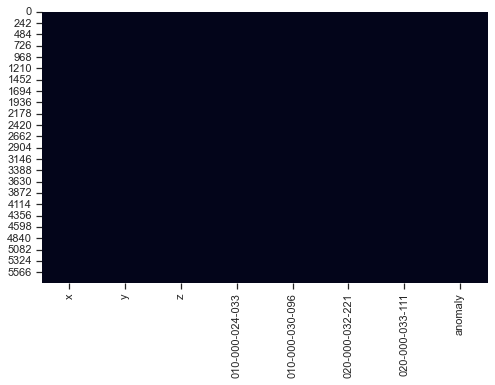

In [180]:
sns.heatmap(dataset.isnull(), cbar=False)

In [181]:
columns_to_drop = list(columns_with_na(dataset))
dataset.drop(columns_to_drop, axis=1, inplace = True)

Columns containing nan values:Index([], dtype='object')


In [182]:
print(dataset['anomaly'].value_counts())
print("Total =", len(dataset))

0.000    5478
1.000     327
Name: anomaly, dtype: int64
Total = 5805


<AxesSubplot:>

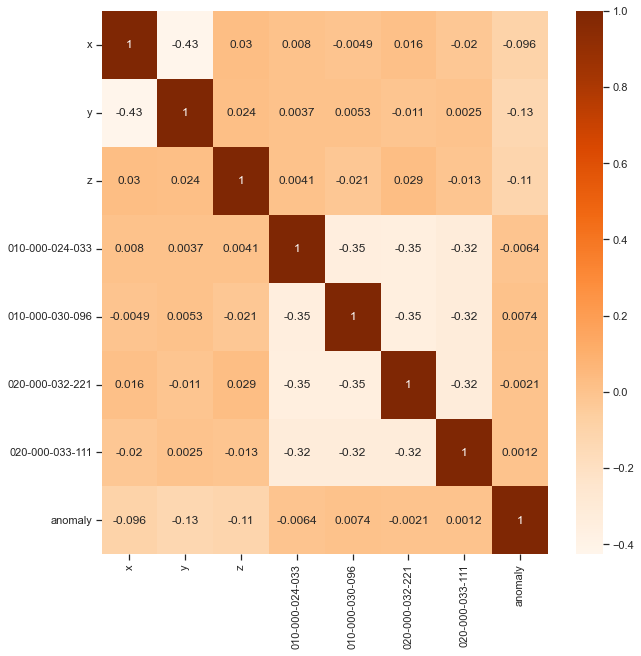

In [183]:
#Matriz de correlacion 
correlacion= full_dataset_train.corr()
fig , ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
sns.heatmap(correlacion,annot=True,cmap="Oranges")

In [184]:
# Corelation with target
corr = full_dataset_train.corr()
pd.DataFrame(corr['anomaly']).sort_values(by='anomaly',ascending = False).style.background_gradient(cmap = 'Reds')

,anomaly
anomaly,1.000000
010-000-030-096,0.007371
020-000-033-111,0.001192
020-000-032-221,-0.002069
010-000-024-033,-0.006422
x,-0.096403
z,-0.113559
y,-0.130814


array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>],
       [<AxesSubplot:title={'center':'010-000-024-033'}>,
        <AxesSubplot:title={'center':'010-000-030-096'}>,
        <AxesSubplot:title={'center':'020-000-032-221'}>],
       [<AxesSubplot:title={'center':'020-000-033-111'}>,
        <AxesSubplot:title={'center':'anomaly'}>, <AxesSubplot:>]],
      dtype=object)

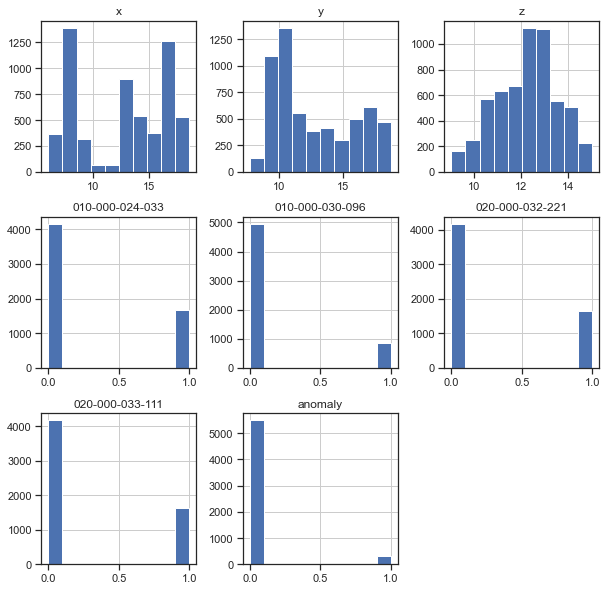

In [185]:
dataset.hist(figsize=(10,10))

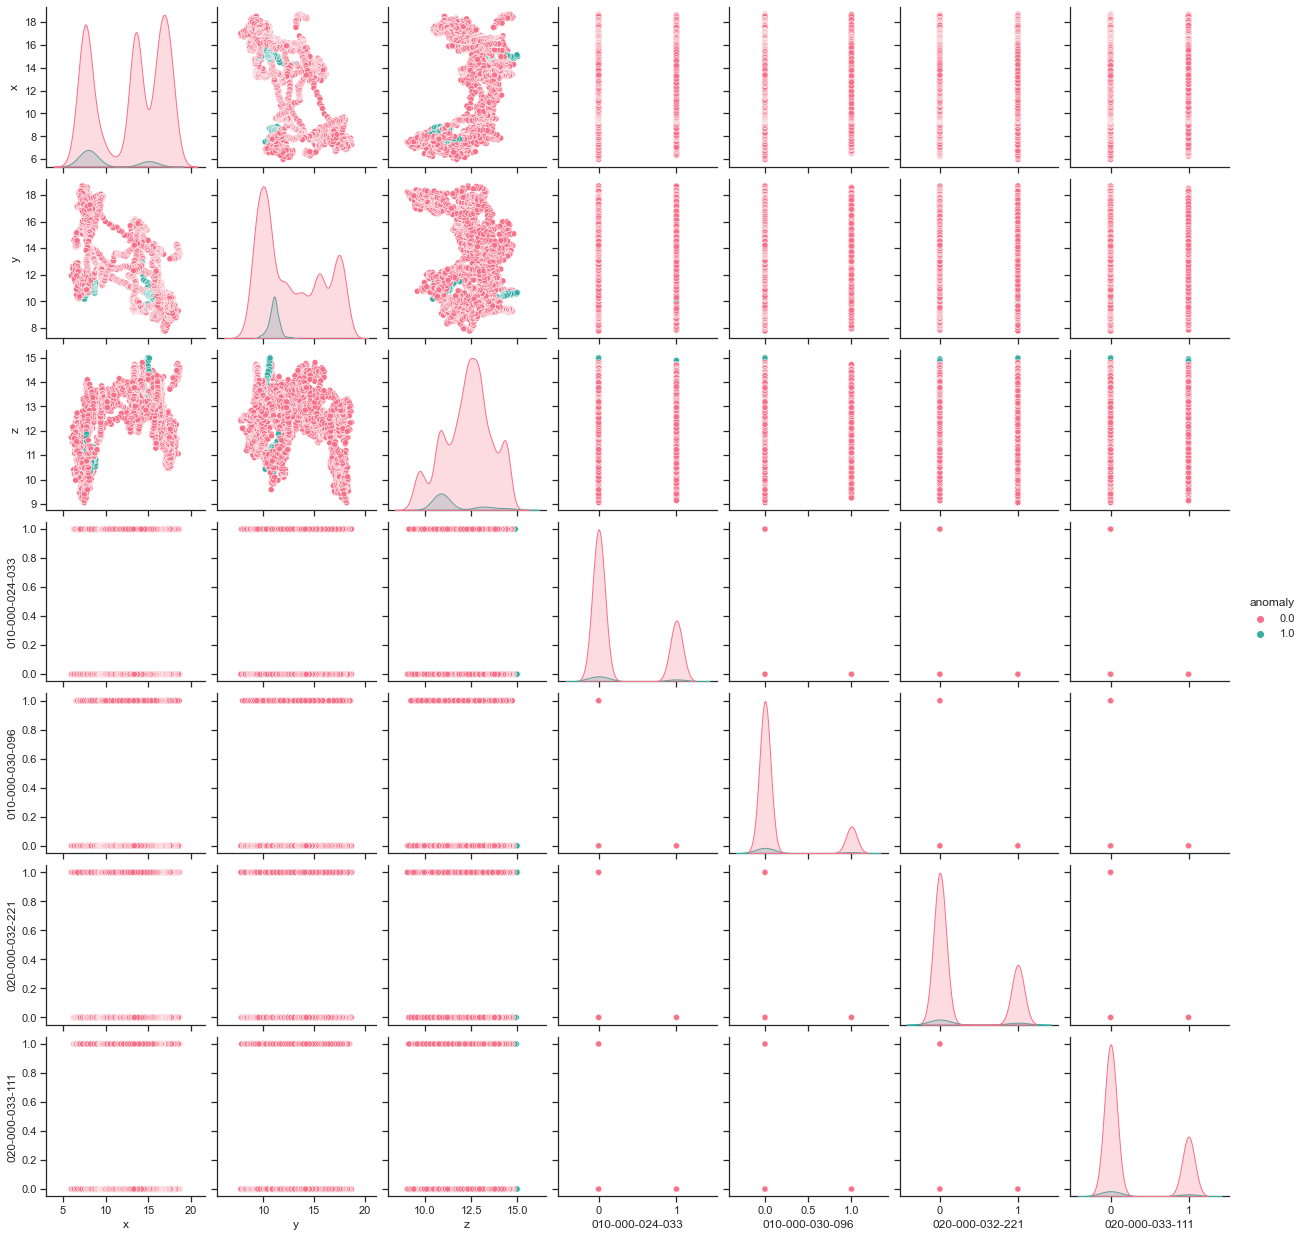

In [131]:
sns.pairplot(dataset, hue='anomaly', diag_kind = "kde", kind = "scatter", palette = "husl")

In [132]:
#Normalizacion de los datos
#Muestra Unica
dataset_copy=dataset.copy()
dataset_copy=dataset_copy.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
dataset_norm=(dataset_copy - dataset_copy.min()) / ( dataset_copy.max() - dataset_copy.min())



#Trabajando con el conjunto total
dataset_copy=full_dataset_train.copy()
dataset_copy=dataset_copy.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
dataset_norm_full=(dataset_copy - dataset_copy.min()) / ( dataset_copy.max() - dataset_copy.min())


#Trabajando con el conjunto total de test 
dataset_copy=full_dataset_test.copy()
dataset_copy=dataset_copy.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
dataset_norm_full_test=(dataset_copy - dataset_copy.min()) / ( dataset_copy.max() - dataset_copy.min())


In [134]:
#Guardamos aquellos datos con anomalias.
anomaly=dataset_norm_full.loc[dataset_norm_full.loc[:, 'anomaly'] > 0]
Non_anomaly=dataset_norm_full.loc[dataset_norm_full.loc[:, 'anomaly'] == 0]
anomaly_count,Non_anomaly_count = dataset_norm_full["anomaly"].value_counts()
print (anomaly.shape)
print (Non_anomaly.shape)

(6573, 8)
(127656, 8)


total class of 1 and 0 : 0.000    127656
1.000      6573
Name: anomaly, dtype: int64


<AxesSubplot:title={'center':'Proporcion de elementos de clases'}>

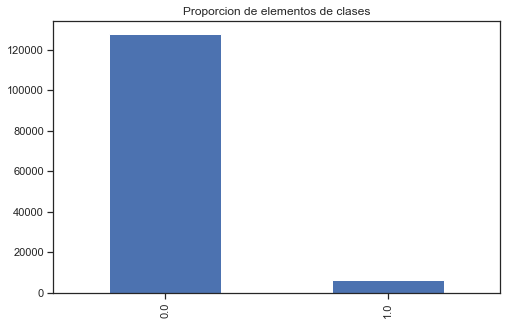

In [186]:
#Proporcion de las clases
anomaly_under= anomaly.sample(Non_anomaly_count)
test_under= pd.concat([anomaly_under,Non_anomaly],axis=0)
print("total class of 1 and 0 :",test_under['anomaly'].value_counts())
test_under['anomaly'].value_counts().plot(kind='bar', title='Proporcion de elementos de clases')

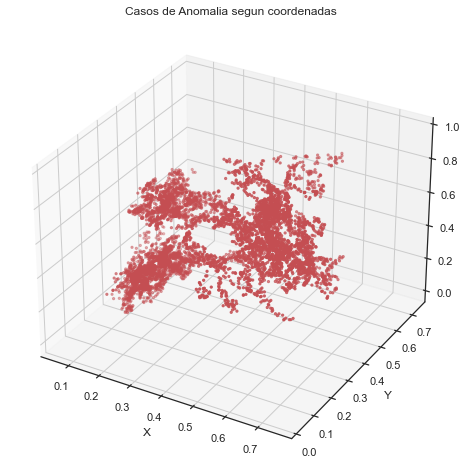

In [136]:
#Representacion de los puntos
# Creamos la figura
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')
x=anomaly['x']
y=anomaly['y']
z=anomaly['z']

# Agregamos los puntos en el plano 3D
ax1.scatter(x, y, z, c='r', marker='.')
fig.set_figheight(15)
# Mostramos el gráfico
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Casos de Anomalia segun coordenadas')
plt.show()

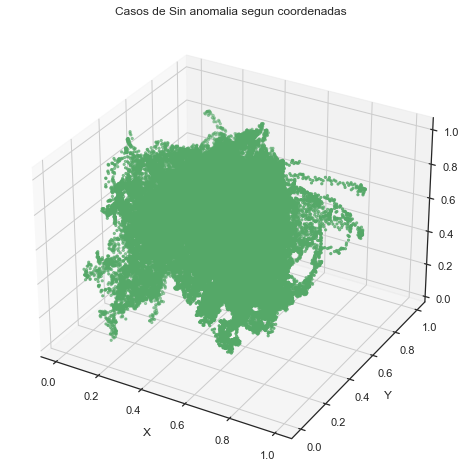

In [137]:
#Representacion de los puntos
# Creamos la figura
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')
x=Non_anomaly['x']
y=Non_anomaly['y']
z=Non_anomaly['z']

# Agregamos los puntos en el plano 3D
ax1.scatter(x, y, z, c='g', marker='.')
fig.set_figheight(15)
# Mostramos el gráfico
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Casos de Sin anomalia segun coordenadas')
plt.show()
plt.show()

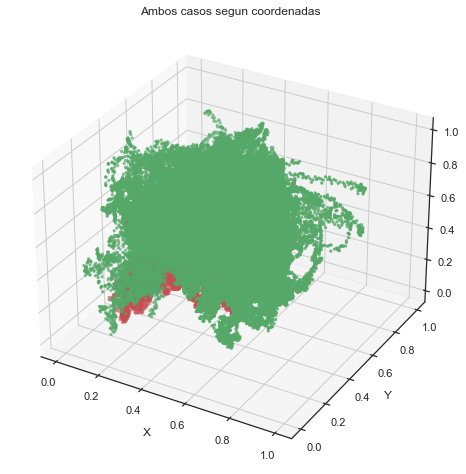

In [138]:
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')
x=Non_anomaly['x']
y=Non_anomaly['y']
z=Non_anomaly['z']

xA=anomaly['x']
yA=anomaly['y']
zA=anomaly['z']
# Agregamos los puntos en el plano 3D
ax1.scatter(xA, yA, zA, c='r', marker='X')
ax1.scatter(x, y, z, c='g', marker='.')
fig.set_figheight(15)
# Mostramos el gráfico
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Ambos casos segun coordenadas')
plt.show()
plt.show()

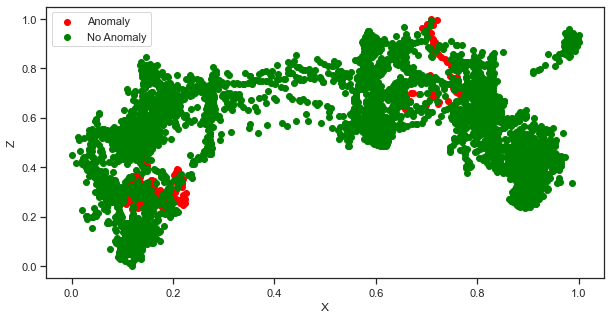

In [139]:
plt.subplots(figsize=(10, 5))
plt.scatter(x=dataset_norm.x[dataset_norm.anomaly==1], y=dataset_norm.z[(dataset_norm.anomaly==1)], c="red")
plt.scatter(x=dataset_norm.x[dataset_norm.anomaly==0], y=dataset_norm.z[(dataset_norm.anomaly==0)], c="green")
plt.legend(["Anomaly", "No Anomaly"])
plt.xlabel("X")
plt.ylabel("Z")
plt.show()

In [140]:
chart = alt.Chart(full_dataset_train.sample(n=1000)).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='anomaly:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['x', 'y', 'z'],
    column=['z', 'y', 'x']
).interactive()
chart

alt.RepeatChart(...)

## Creacion de diferentes clases en base al tipo de sensor 

In [141]:
ancle_left = dataset_norm_full[dataset_norm_full["010-000-024-033"] == 1][["x", "y", "z", "anomaly"]]
ancle_rigth = dataset_norm_full[dataset_norm_full["010-000-030-096"] == 1][["x", "y", "z", "anomaly"]]
chest = dataset_norm_full[dataset_norm_full["020-000-033-111"] == 1][["x", "y", "z", "anomaly"]]
belt= dataset_norm_full[dataset_norm_full["020-000-032-221"] == 1][["x", "y", "z", "anomaly"]]

In [142]:
resultados_rf=pd.DataFrame(columns=["Modelo","Precision","Clase"])
modelos = pd.DataFrame(columns=["Modelo","Precision","Tiempo"])
list_sensor=[ancle_left,ancle_rigth,chest,belt]

In [143]:
sns.set(rc={'figure.figsize':(8, 5)})
sns.set_theme()
sns.set_style("ticks")

Text(0.5, 1.0, 'Ancle_left sensor ')

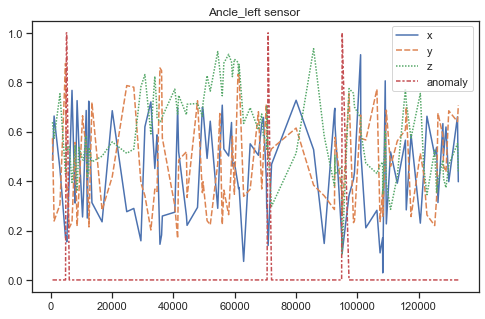

In [144]:
# ancle_left sensor 
sns.lineplot(data=ancle_left.sample(100)).set_title('Ankle_left sensor ')

Text(0.5, 1.0, 'Ancle_rigth sensor')

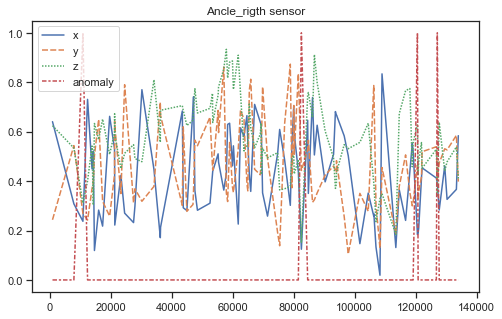

In [145]:
# ancle_rigth sensor 
sns.lineplot(data=ancle_rigth.sample(100)).set_title('Ankle_rigth sensor')

Text(0.5, 1.0, 'Chest sensor ')

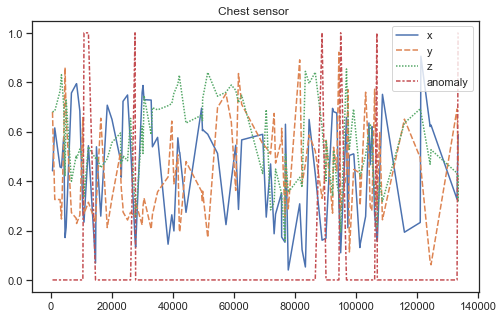

In [146]:
# Chest sensor 
sns.lineplot(data=chest.sample(100)).set_title('Chest sensor ')

Text(0.5, 1.0, 'Belt sensor')

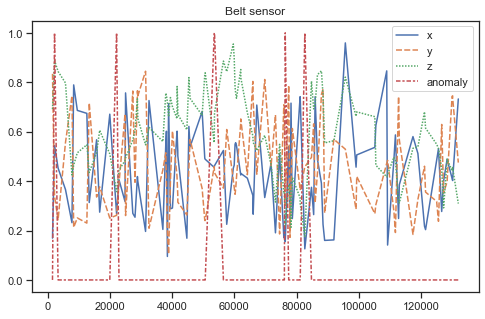

In [147]:
# Belt sensor 
sns.lineplot(data=belt.sample(100)).set_title('Belt sensor')

## Clasificacion con modelos 

In [148]:
#Evalucion de los modelos
def evaluate_preds(y_true, y_preds):
  accuracy = accuracy_score(y_true, y_preds)
  precision = precision_score(y_true, y_preds)
  recall = recall_score(y_true, y_preds)
  f1 = f1_score(y_true, y_preds)
  print(f"Acc : {round(accuracy, 2) * 100:.2f}%")
  print(f"Precision : {round(precision, 2):.2f}")
  print(f"recall : {round(recall, 2):.2f}")
  print(f"F1 score {round(f1, 2):.2f}")

## RandomForest

### Pruebas segun clases 

In [187]:

names=['ancle_left','ancle_rigth','chest','belt']
i=0
for sensor in list_sensor:
    X=sensor.drop('anomaly',axis=1)
    y=sensor['anomaly']
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.2,random_state=42)
    
    rf = RandomForestClassifier(n_estimators = 1500, n_jobs=-1, max_depth=15, min_samples_split=5, min_samples_leaf=3)
    #Entreno de modelo
    rf=rf.fit(X_train,y_train)
    pred= rf.predict(X_test)

    #Model accuracy
    acc = accuracy_score(y_test, pred)*100
    print('accuracy_score',acc)
    print()

    # Classification Report
    print('Classification Report')
    print(classification_report(y_test, pred))
    valor={"Modelo":"Regresion Logistica","Precision":acc,"Clase":names[i]}
    resultados_rf=resultados_rf.append(valor,ignore_index=True)
    i=i+1
    


accuracy_score 95.60942227344763

Classification Report
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     26438
         1.0       0.71      0.13      0.23      1326

    accuracy                           0.96     27764
   macro avg       0.84      0.57      0.60     27764
weighted avg       0.95      0.96      0.94     27764

accuracy_score 95.31424858308364

Classification Report
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98     26258
         1.0       0.80      0.13      0.23      1443

    accuracy                           0.95     27701
   macro avg       0.88      0.57      0.60     27701
weighted avg       0.95      0.95      0.94     27701

accuracy_score 95.54737194509542

Classification Report
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     22703
         1.0       0.76      0.16      0.26      1193

    accuracy  

In [188]:
resultados_rf.sort_values(by="Precision", ascending=False)

,Modelo,Precision,Clase
3,Regresion Logistica,95.625,belt
7,Regresion Logistica,95.618,belt
4,Regresion Logistica,95.609,ancle_left
0,Regresion Logistica,95.584,ancle_left
2,Regresion Logistica,95.572,chest
6,Regresion Logistica,95.547,chest
1,Regresion Logistica,95.336,ancle_rigth
5,Regresion Logistica,95.314,ancle_rigth


<AxesSubplot:>

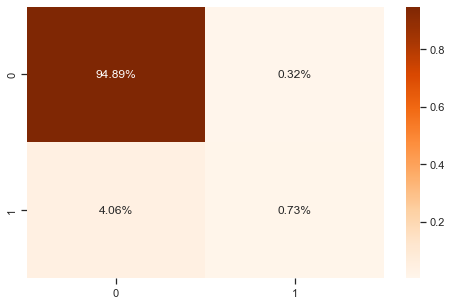

In [219]:
cm_rl=confusion_matrix(y_test,pred)
sns.heatmap(cm_rl/np.sum(cm_rl),annot = True, fmt=  '0.2%',cmap ='Oranges')

### Pruebas con el dataset completo

In [152]:
start_time = timeit.default_timer()
X=dataset_norm_full.drop('anomaly',axis=1)
y=dataset_norm_full['anomaly']

rus = RandomUnderSampler(random_state=42, replacement=True)
X, y = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.2,random_state=42)

#print('Resample dataset shape', Counter(y_rus))
rf = RandomForestClassifier(n_estimators = 1500, n_jobs=-1, max_depth=15, min_samples_split=5, min_samples_leaf=3)
#Entreno de modelo
rf=rf.fit(X_train,y_train)
pred= rf.predict(X_test)

#Model accuracy
acc = accuracy_score(y_test, pred)
print('accuracy_score',acc)
print()

# Classification Report
print('Classification Report')
print(classification_report(y_test, pred))
elapsed = timeit.default_timer() - start_time
valor={"Modelo":"Random Forest","Precision":acc,"Tiempo":elapsed}
modelos=modelos.append(valor,ignore_index=True)

accuracy_score 0.8117333840448797

Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.77      0.80      5293
         1.0       0.78      0.86      0.82      5224

    accuracy                           0.81     10517
   macro avg       0.81      0.81      0.81     10517
weighted avg       0.81      0.81      0.81     10517



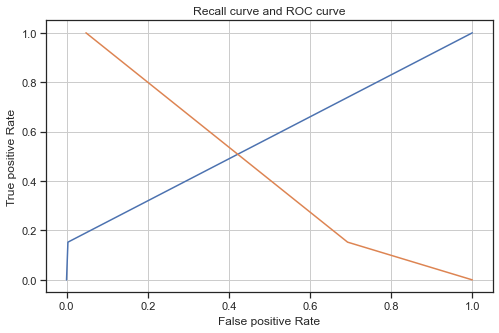

In [196]:
fpr, tpr, threshold = roc_curve(y_test, pred)
plt.plot(fpr, tpr)
fpr, tpr, threshold = precision_recall_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.title('Recall curve and ROC curve')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.grid(True)

<AxesSubplot:>

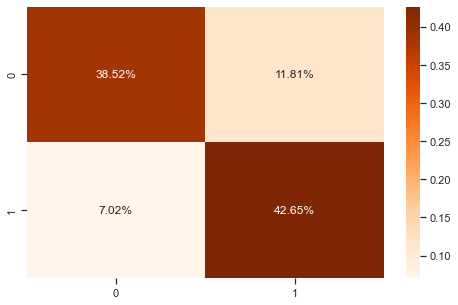

In [155]:
cm_rl=confusion_matrix(y_test,pred)
sns.heatmap(cm_rl/np.sum(cm_rl),annot = True, fmt=  '0.2%',cmap ='Oranges')

## SMV

In [199]:
start_time = timeit.default_timer()
#Modelo
modelo_svm = SVC(C=2.0,kernel='rbf',gamma='scale',probability=True,tol=0.001)
#Entrenamiento del modelo
modelo_svm.fit(X_train,y_train)
#Prediccion en base al training test
prediccion_svg=modelo_svm.predict(X_test)
#Accuracy obtenido
acc_svg=accuracy_score(y_test,prediccion_svg)
print('accuracy_score',acc_svg)
print()
# Classification Report
print('Classification Report')
print(classification_report(y_test, pred))
elapsed = timeit.default_timer() - start_time
valor={"Modelo":"SVG_rbf","Precision":acc_svg,"Tiempo":elapsed}
modelos=modelos.append(valor,ignore_index=True)
acc_svg

accuracy_score 0.9528975164145018

Classification Report
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     26682
         1.0       0.69      0.15      0.25      1342

    accuracy                           0.96     28024
   macro avg       0.83      0.57      0.61     28024
weighted avg       0.95      0.96      0.94     28024



0.9528975164145018

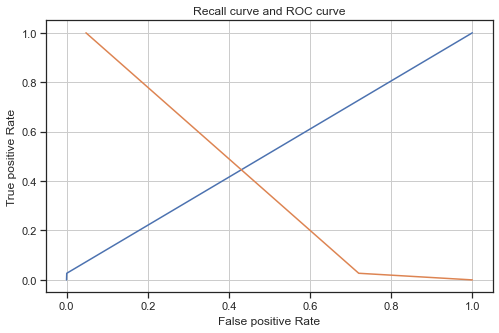

In [200]:

fpr, tpr, threshold = roc_curve(y_test, prediccion_svg)
plt.plot(fpr, tpr)
fpr, tpr, threshold = precision_recall_curve(y_test, prediccion_svg)
plt.plot(fpr, tpr)
plt.title('Recall curve and ROC curve')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.grid(True)

<AxesSubplot:>

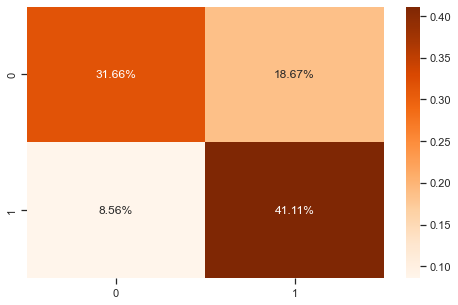

In [158]:
cm_svg=confusion_matrix(y_test,prediccion_svg)
sns.heatmap(cm_svg/np.sum(cm_svg),annot = True, fmt=  '0.2%',cmap ='Oranges')

## KNN 

In [202]:
start_time = timeit.default_timer()
#Modelo
knn =  KNeighborsClassifier(n_neighbors=15)
#Entrenamiento del modelo
knn.fit(X_train, y_train)
#Prediccion en base al training test
prediccion_knn=knn.predict(X_test)
#Accuracy obtenido
acc_knn=accuracy_score(y_test,prediccion_knn)
print('accuracy_score',acc_knn)
print()
# Classification Report
print('Classification Report')
print(classification_report(y_test, pred))

elapsed = timeit.default_timer() - start_time
valor={"Modelo":"Knn","Precision":acc_knn,"Tiempo":elapsed}
modelos=modelos.append(valor,ignore_index=True)
acc_knn

accuracy_score 0.9560733656865544

Classification Report
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     26682
         1.0       0.69      0.15      0.25      1342

    accuracy                           0.96     28024
   macro avg       0.83      0.57      0.61     28024
weighted avg       0.95      0.96      0.94     28024



0.9560733656865544

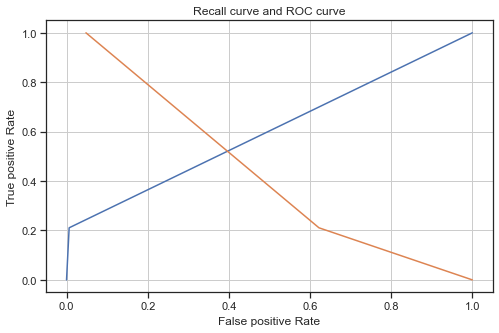

In [203]:
fpr, tpr, threshold = roc_curve(y_test, prediccion_knn)
plt.plot(fpr, tpr)
fpr, tpr, threshold = precision_recall_curve(y_test, prediccion_knn)
plt.plot(fpr, tpr)
plt.title('Recall curve and ROC curve')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.grid(True)

<AxesSubplot:>

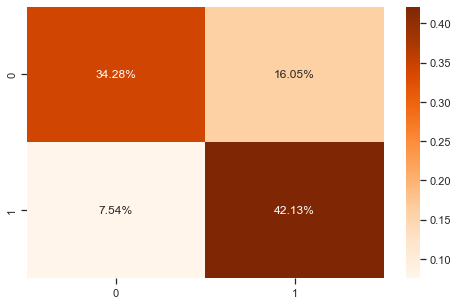

In [161]:
cm_knn=confusion_matrix(y_test,prediccion_knn)
sns.heatmap(cm_knn/np.sum(cm_knn),annot = True, fmt=  '0.2%', cmap ='Oranges')

## Regresion Logistica

In [207]:
start_time = timeit.default_timer()
#Modelo
modelo=LogisticRegression(C=0.010,fit_intercept=True, penalty='l2',tol=0.001)
#Entrenamiento del modelo
modelo.fit(X_train,y_train)
#Prediccion en base al training test
prediccion=modelo.predict(X_test)
#Accuracy obtenido
acc=accuracy_score(y_test,prediccion)
print('accuracy_score',acc)
print()
# Classification Report
print('Classification Report')
print(classification_report(y_test, pred))
elapsed = timeit.default_timer() - start_time
valor={"Modelo":"Regresion Logistica","Precision":acc,"Tiempo":elapsed}
modelos=modelos.append(valor,ignore_index=True)
acc

accuracy_score 0.9521124750214102

Classification Report
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     26682
         1.0       0.69      0.15      0.25      1342

    accuracy                           0.96     28024
   macro avg       0.83      0.57      0.61     28024
weighted avg       0.95      0.96      0.94     28024



0.9521124750214102

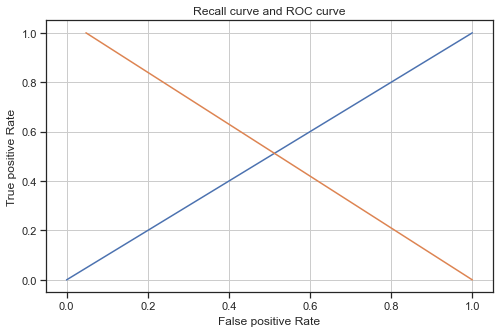

In [208]:
fpr, tpr, threshold = roc_curve(y_test, prediccion)
plt.plot(fpr, tpr)
fpr, tpr, threshold = precision_recall_curve(y_test, prediccion)
plt.plot(fpr, tpr)
plt.title('Recall curve and ROC curve')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.grid(True)

<AxesSubplot:>

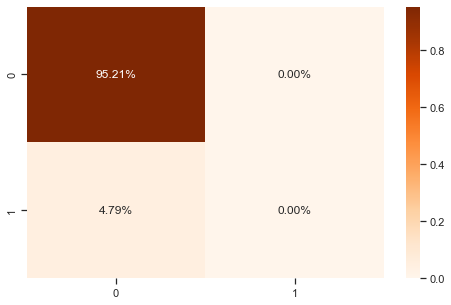

In [209]:
cm_rl=confusion_matrix(y_test,prediccion)
sns.heatmap(cm_rl/np.sum(cm_rl),annot = True, fmt=  '0.2%',cmap ='Oranges')

In [210]:
modelos

,Modelo,Precision,Tiempo
0,Random Forest,0.812,4.127
1,SVG_rbf,0.728,5.520
2,Knn,0.764,0.519
3,Regresion Logistica,0.668,0.095
4,SVG_rbf,0.953,8.492
5,Knn,0.956,1.060
6,Regresion Logistica,0.952,0.118
7,Regresion Logistica,0.952,0.097


## Conclusion 

Durante el desarrollo de la implementación del caso Kaggle, pude constatar la importancia de poder interpretar los datos, ya que es imprescindible para un correcto estudio u análisis.

En mi caso por la distribución de los datos, pude constatar que se producía Overfitting, esto debido a que contaba con un dataset, que si bien solo constaba de dos clases de clasificación, en este caso, aquellos casos que presentaban una anomalía y los que no, existían un mayor número de clases del segundo caso, por lo cual el modelo de entrenamiento, no era capaz de hacer una buena predicción, si los datos de evolución que proporcionaban eran buenos, en la práctica no estaba clasificando correctamente, por lo cual fue necesario implementar técnicas para balancear correctamente los datos.